In [1]:
import sys

# -----------------------------
# HARD RESET of conflicting libs
# -----------------------------
!{sys.executable} -m pip uninstall -y numpy pandas-ta numba scipy gensim contourpy bottleneck numexpr ta tensorflow

# -----------------------------
# Install a STABLE, COMPATIBLE stack
# -----------------------------
!{sys.executable} -m pip install \
    "numpy<2" \
    pandas \
    yfinance \
    scipy \
    numba \
    gensim \
    contourpy \
    bottleneck \
    numexpr \
    ta

# -----------------------------
# Verification (must not error)
# -----------------------------
import numpy, pandas, scipy, numba, yfinance
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("SciPy:", scipy.__version__)
print("Numba:", numba.__version__)
print("Environment is STABLE")


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: pandas-ta 0.4.71b0
Uninstalling pandas-ta-0.4.71b0:
  Successfully uninstalled pandas-ta-0.4.71b0
Found existing installation: numba 0.61.2
Uninstalling numba-0.61.2:
  Successfully uninstalled numba-0.61.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: contourpy 1.2.0
Uninstalling contourpy-1.2.0:
  Successfully uninstalled contourpy-1.2.0
Found existing installation: Bottleneck 1.6.0
Uninstalling Bottleneck-1.6.0:
  Successfully uninstalled Bottleneck-1.6.0
Found existing installation: numexpr 2.14.1
Uninstalling numexpr-2.14.1:
  Successfully uninstalled numexpr-2.14.1
Found existing installation: ta 0.11.0
Uninstalling ta-0.11.0:
  Successfully uninstal

You can safely remove it manually.
  You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached bottleneck-1.6.0-cp312-cp312-win_amd64.whl.metadata (8.4 kB)
  Using cached numexpr-2.14.1-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached ta-0.11.0-py3-none-any.whl
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   - -------------------------------------- 1.0/36.3 MB 5.0 MB/s eta 0:00:07
   -- ------------------------------------- 1.8/36.3 MB 4.4 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/36.3 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.4/36.3 MB 4.1 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/36.3 MB 4.0 MB/s eta 0:00:08
   ----- ---------------------------------- 5.2/36.3 MB 4.0 MB/s eta 0:00:08
   ------ --------------------------------- 6.0/36.3 MB 4.0 MB/s eta 0:00:08
   ------- -------------------------------- 6.8/36.3 MB 4.0 MB/s e

In [1]:
# -----------------------------
# Install required packages (run once)
# -----------------------------
import sys
!{sys.executable} -m pip install -q yfinance pandas

# -----------------------------
# Imports
# -----------------------------
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# -----------------------------
# Parameters
# -----------------------------
SYMBOL = "INFY.NS"        # NSE stock
INTERVAL = "1h"

# -----------------------------
# Auto Time Range (Last 12 Months)
# -----------------------------
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# -----------------------------
# Fetch Yahoo Finance Data
# -----------------------------
df = yf.download(
    tickers=SYMBOL,
    start=start_date,
    end=end_date,
    interval=INTERVAL,
    progress=False,
    auto_adjust=False
)

# -----------------------------
# Fix MultiIndex Columns (IMPORTANT)
# -----------------------------
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# -----------------------------
# Clean & Prepare DataFrame
# -----------------------------
df = df.reset_index(drop=False)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Drop rows only if essential columns are missing
df.dropna(subset=["open", "high", "low", "close"], inplace=True)

# -----------------------------
# Result
# -----------------------------
print(df.head())
print(f"\nRows: {len(df)}")
print(f"Columns: {list(df.columns)}")


Price                  datetime    adj_close        close         high  \
0     2025-01-21 03:45:00+00:00  1816.349976  1816.349976  1828.199951   
1     2025-01-21 04:45:00+00:00  1812.000000  1812.000000  1816.750000   
2     2025-01-21 05:45:00+00:00  1826.849976  1826.849976  1831.500000   
3     2025-01-21 06:45:00+00:00  1827.000000  1827.000000  1829.949951   
4     2025-01-21 07:45:00+00:00  1820.449951  1820.449951  1829.000000   

Price          low         open   volume  
0      1812.449951  1819.750000        0  
1      1802.900024  1816.349976   608050  
2      1806.400024  1812.000000  1503525  
3      1806.949951  1826.349976   982734  
4      1813.449951  1826.849976   608682  

Rows: 1724
Columns: ['datetime', 'adj_close', 'close', 'high', 'low', 'open', 'volume']


In [2]:
import numpy as np
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# -----------------------------
# Sort by time (IMPORTANT)
# -----------------------------
df = df.sort_values("datetime").reset_index(drop=True)

# -----------------------------
# Price-based features
# -----------------------------
df["return_1"] = df["close"].pct_change()
df["return_3"] = df["close"].pct_change(3)
df["return_6"] = df["close"].pct_change(6)

# -----------------------------
# Moving Averages
# -----------------------------
df["sma_5"] = SMAIndicator(close=df["close"], window=5).sma_indicator()
df["sma_10"] = SMAIndicator(close=df["close"], window=10).sma_indicator()
df["ema_5"] = EMAIndicator(close=df["close"], window=5).ema_indicator()
df["ema_10"] = EMAIndicator(close=df["close"], window=10).ema_indicator()

# -----------------------------
# Momentum Indicators
# -----------------------------
df["rsi_14"] = RSIIndicator(close=df["close"], window=14).rsi()

macd = MACD(close=df["close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()

# -----------------------------
# Volatility
# -----------------------------
df["volatility_10"] = df["close"].rolling(10).std()

# -----------------------------
# Cleanup
# -----------------------------
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# -----------------------------
# Result
# -----------------------------
print(df.head())
print(f"\nFinal shape: {df.shape}")


Price                  datetime    adj_close        close         high  \
0     2025-01-27 08:45:00+00:00  1819.699951  1819.699951  1825.449951   
1     2025-01-27 09:45:00+00:00  1823.650024  1823.650024  1825.449951   
2     2025-01-28 03:45:00+00:00  1845.000000  1845.000000  1863.500000   
3     2025-01-28 04:45:00+00:00  1847.400024  1847.400024  1853.750000   
4     2025-01-28 05:45:00+00:00  1849.949951  1849.949951  1857.250000   

Price          low         open   volume  return_1  return_3  return_6  \
0      1812.449951  1819.849976  1128858 -0.000082 -0.012562 -0.029726   
1      1819.699951  1819.699951   427204  0.002171 -0.006158 -0.018408   
2      1834.150024  1836.400024        0  0.011707  0.013820 -0.000406   
3      1836.550049  1845.000000  1073829  0.001301  0.015222  0.002469   
4      1842.349976  1847.449951   623716  0.001380  0.014422  0.008175   

Price        sma_5       sma_10        ema_5       ema_10     rsi_14  \
0      1832.619971  1853.879993  1832.

In [3]:
# -----------------------------
# Prediction Horizon (hours)
# -----------------------------
HORIZON = 3

# -----------------------------
# Create Target Label
# -----------------------------
df["future_close"] = df["close"].shift(-HORIZON)
df["target"] = (df["future_close"] > df["close"]).astype(int)

# -----------------------------
# Drop leakage columns
# -----------------------------
df.drop(columns=["future_close"], inplace=True)

# Drop last HORIZON rows (no future data)
df = df.iloc[:-HORIZON].reset_index(drop=True)

# -----------------------------
# Check Target Distribution
# -----------------------------
print(df["target"].value_counts())
print("\nFinal shape:", df.shape)


target
0    877
1    811
Name: count, dtype: int64

Final shape: (1688, 19)


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import lightgbm as lgb

from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator

from sklearn.metrics import accuracy_score, roc_auc_score

# -----------------------------
# 1. FETCH NIFTY 50 DATA
# -----------------------------
nifty = yf.download(
    "^NSEI",
    start=df["datetime"].min(),
    end=df["datetime"].max(),
    interval="1h",
    progress=False
)

if nifty.empty:
    raise ValueError("NIFTY data download failed.")

# Fix MultiIndex if present
if isinstance(nifty.columns, pd.MultiIndex):
    nifty.columns = nifty.columns.get_level_values(0)

nifty = nifty.reset_index()
nifty.columns = nifty.columns.str.lower()

if "datetime" not in nifty.columns:
    nifty.rename(columns={"date": "datetime"}, inplace=True)

# -----------------------------
# 2. NIFTY FEATURE ENGINEERING
# -----------------------------
nifty["nifty_return_1"] = nifty["close"].pct_change()
nifty["nifty_rsi_14"] = RSIIndicator(nifty["close"], window=14).rsi()
nifty["nifty_sma_10"] = SMAIndicator(nifty["close"], window=10).sma_indicator()

nifty = nifty[[
    "datetime",
    "nifty_return_1",
    "nifty_rsi_14",
    "nifty_sma_10"
]]

nifty.dropna(inplace=True)

# -----------------------------
# 3. MERGE WITH STOCK DATA
# -----------------------------
df = df.merge(nifty, on="datetime", how="inner")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# -----------------------------
# 4. TARGET (6-HOUR HORIZON)
# -----------------------------
HORIZON = 6
df["future_close"] = df["close"].shift(-HORIZON)
df["target"] = (df["future_close"] > df["close"]).astype(int)

df.drop(columns=["future_close"], inplace=True)
df = df.iloc[:-HORIZON].reset_index(drop=True)

# -----------------------------
# 5. NORMALIZED RETURN FEATURE
# -----------------------------
df["z_return_1"] = df["return_1"] / (df["volatility_10"] + 1e-6)

# -----------------------------
# 6. FEATURE / TARGET SPLIT
# -----------------------------
FEATURE_COLS = [c for c in df.columns if c not in ["datetime", "target"]]

X = df[FEATURE_COLS]
y = df["target"]

# -----------------------------
# 7. TIME-BASED SPLIT
# -----------------------------
split_idx = int(len(df) * 0.7)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# -----------------------------
# 8. LIGHTGBM MODEL
# -----------------------------
model = lgb.LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=4,
    num_leaves=16,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------
# 9. EVALUATION
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_prob), 4))

# -----------------------------
# 10. CONFIDENCE-BASED SIGNALS
# -----------------------------
df_test = df.iloc[split_idx:].copy()
df_test["prob_up"] = y_prob

df_test["signal"] = np.where(
    df_test["prob_up"] > 0.6, 1,
    np.where(df_test["prob_up"] < 0.4, -1, 0)
)

print("\nSignal distribution:")
print(df_test["signal"].value_counts())

# -----------------------------
# 11. FEATURE IMPORTANCE
# -----------------------------
importance = pd.Series(
    model.feature_importances_,
    index=FEATURE_COLS
).sort_values(ascending=False)

print("\nTop 10 Features:")
print(importance.head(10))


[LightGBM] [Info] Number of positive: 526, number of negative: 640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451115 -> initscore=-0.196167
[LightGBM] [Info] Start training from score -0.196167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

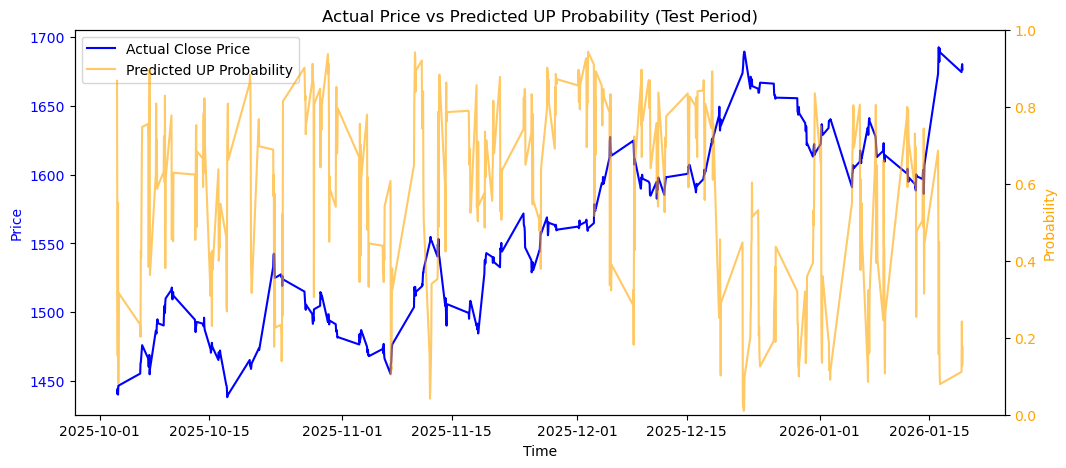

In [6]:
import matplotlib.pyplot as plt

df_plot = df_test.copy()

fig, ax1 = plt.subplots(figsize=(12, 5))

# -----------------------------
# Price (LEFT axis)
# -----------------------------
price_line, = ax1.plot(
    df_plot["datetime"],
    df_plot["close"],
    color="blue",
    label="Actual Close Price"
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# -----------------------------
# Probability (RIGHT axis)
# -----------------------------
ax2 = ax1.twinx()

prob_line, = ax2.plot(
    df_plot["datetime"],
    df_plot["prob_up"],
    color="orange",
    alpha=0.6,
    label="Predicted UP Probability"
)

ax2.set_ylabel("Probability", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.set_ylim(0, 1)

# -----------------------------
# Combined legend (IMPORTANT)
# -----------------------------
lines = [price_line, prob_line]
labels = [l.get_label() for l in lines]

ax1.legend(lines, labels, loc="upper left")

plt.title("Actual Price vs Predicted UP Probability (Test Period)")
plt.show()


In [9]:
import numpy as np
import pandas as pd

def backtest_ml_strategy(
    df,
    model,
    feature_cols,
    split_idx,
    horizon=6,
    buy_th=0.6,
    sell_th=0.4,
    stop_loss=0.01,
    cost=0.0005,          # 0.05% per trade
    use_position_sizing=True
):
    """
    ML-based long/short backtest with:
    - non-overlapping trades
    - stop-loss
    - transaction cost
    - optional confidence-based sizing
    """

    df_bt = df.iloc[split_idx:].copy()
    X_bt = df_bt[feature_cols]

    df_bt["prob_up"] = model.predict_proba(X_bt)[:, 1]

    df_bt["signal"] = np.where(
        df_bt["prob_up"] > buy_th, 1,
        np.where(df_bt["prob_up"] < sell_th, -1, 0)
    )

    trades = []
    i = 0

    while i < len(df_bt) - horizon:
        row = df_bt.iloc[i]
        signal = row["signal"]

        if signal == 0:
            i += 1
            continue

        entry_price = row["close"]
        entry_time = row["datetime"]
        exit_price = None
        exit_time = None
        reason = "horizon"

        # position sizing (confidence-based)
        size = 1.0
        if use_position_sizing:
            size = min(1.0, abs(row["prob_up"] - 0.5) * 2)

        for j in range(1, horizon + 1):
            price = df_bt.iloc[i + j]["close"]

            if signal == 1 and (price - entry_price) / entry_price <= -stop_loss:
                exit_price = price
                exit_time = df_bt.iloc[i + j]["datetime"]
                reason = "stop_loss"
                break

            if signal == -1 and (entry_price - price) / entry_price <= -stop_loss:
                exit_price = price
                exit_time = df_bt.iloc[i + j]["datetime"]
                reason = "stop_loss"
                break

        if exit_price is None:
            exit_price = df_bt.iloc[i + horizon]["close"]
            exit_time = df_bt.iloc[i + horizon]["datetime"]

        # raw return
        if signal == 1:
            ret = (exit_price - entry_price) / entry_price
        else:
            ret = (entry_price - exit_price) / entry_price

        # apply cost + sizing
        ret = size * ret - cost

        trades.append({
            "entry_time": entry_time,
            "exit_time": exit_time,
            "signal": signal,
            "prob_up": row["prob_up"],
            "size": size,
            "return": ret,
            "exit_reason": reason
        })

        i += j  # prevent overlap

    trades_df = pd.DataFrame(trades)

    if trades_df.empty:
        raise ValueError("No trades generated.")

    # metrics
    equity = (1 + trades_df["return"]).cumprod()

    metrics = {
        "total_trades": len(trades_df),
        "win_rate": (trades_df["return"] > 0).mean(),
        "avg_return": trades_df["return"].mean(),
        "cumulative_return": equity.iloc[-1] - 1,
        "max_drawdown": ((equity - equity.cummax()) / equity.cummax()).min()
    }

    return trades_df, equity, metrics


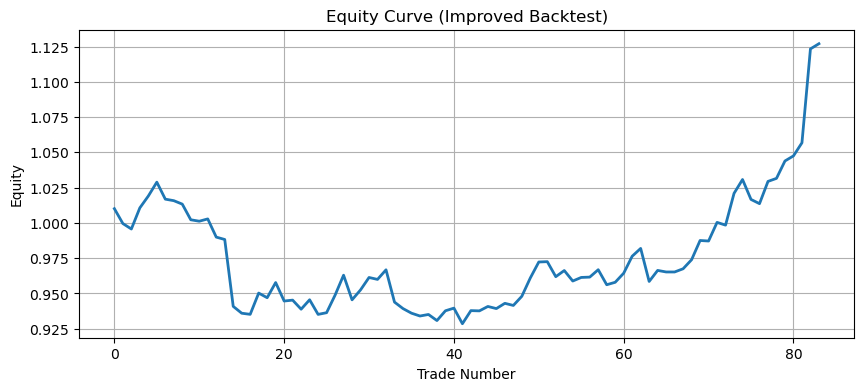

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(equity, linewidth=2)
plt.title("Equity Curve (Improved Backtest)")
plt.xlabel("Trade Number")
plt.ylabel("Equity")
plt.grid(True)
plt.show()



Walk-Forward with TREND-STRENGTH FILTER:

[LightGBM] [Info] Number of positive: 424, number of negative: 485
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6379
[LightGBM] [Info] Number of data points in the train set: 909, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466447 -> initscore=-0.134415
[LightGBM] [Info] Start training from score -0.134415
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

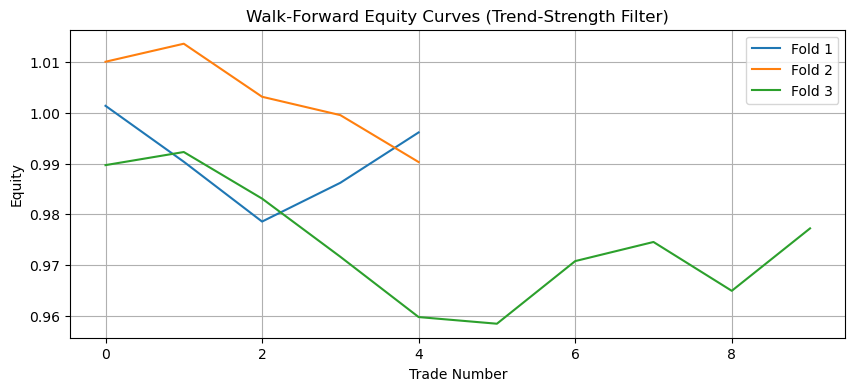

In [16]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# =========================================================
# 1. ADD TREND-STRENGTH FEATURES
# =========================================================
df = df.copy()

df["ma_50"] = df["close"].rolling(50).mean()
df["vol_10"] = df["close"].rolling(10).std()
df["vol_50"] = df["close"].rolling(50).std()

# 🔑 Trend strength: MA slope
df["ma_slope"] = df["ma_50"] - df["ma_50"].shift(5)

# ✅ FINAL REGIME FILTER:
# Direction + Volatility + Trend Strength
df["regime_ok"] = (
    (df["close"] > df["ma_50"]) &
    (df["vol_10"] > 0.6 * df["vol_50"]) &
    (df["ma_slope"] > 0)
).astype(int)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# =========================================================
# 2. BACKTEST FUNCTION (UNCHANGED LOGIC)
# =========================================================
def backtest_ml_strategy(
    df,
    model,
    feature_cols,
    split_idx,
    horizon=6,
    buy_th=0.55,
    sell_th=0.45,
    stop_loss=0.01,
    cost=0.0005
):
    df_bt = df.iloc[split_idx:].copy()
    X_bt = df_bt[feature_cols]

    df_bt["prob_up"] = model.predict_proba(X_bt)[:, 1]

    df_bt["signal"] = np.where(
        df_bt["prob_up"] > buy_th, 1,
        np.where(df_bt["prob_up"] < sell_th, -1, 0)
    )

    returns = []
    i = 0

    while i < len(df_bt) - horizon:
        row = df_bt.iloc[i]

        # 🚨 FINAL REGIME GATE
        if row["regime_ok"] == 0 or row["signal"] == 0:
            i += 1
            continue

        signal = row["signal"]
        entry_price = row["close"]
        exit_price = None

        for j in range(1, horizon + 1):
            price = df_bt.iloc[i + j]["close"]

            if signal == 1 and (price - entry_price) / entry_price <= -stop_loss:
                exit_price = price
                break

            if signal == -1 and (entry_price - price) / entry_price <= -stop_loss:
                exit_price = price
                break

        if exit_price is None:
            exit_price = df_bt.iloc[i + horizon]["close"]

        if signal == 1:
            ret = (exit_price - entry_price) / entry_price
        else:
            ret = (entry_price - exit_price) / entry_price

        returns.append(ret - cost)
        i += j

    returns = np.array(returns)

    if len(returns) == 0:
        return None, None, None

    equity = (1 + returns).cumprod()
    metrics = {
        "total_trades": len(returns),
        "win_rate": (returns > 0).mean(),
        "avg_return": returns.mean(),
        "cumulative_return": equity[-1] - 1,
        "max_drawdown": ((equity - np.maximum.accumulate(equity)) /
                         np.maximum.accumulate(equity)).min()
    }

    return returns, equity, metrics

# =========================================================
# 3. WALK-FORWARD VALIDATION
# =========================================================
FEATURE_COLS = [c for c in df.columns if c not in ["datetime", "target"]]

n = len(df)
start = 0
fold = 1
equity_curves = []

print("\nWalk-Forward with TREND-STRENGTH FILTER:\n")

while True:
    train_end = int(start + 0.6 * n)
    test_end = int(train_end + 0.15 * n)

    if test_end >= n:
        break

    train_df = df.iloc[start:train_end]
    test_df = df.iloc[train_end:test_end]

    model = lgb.LGBMClassifier(
        n_estimators=600,
        learning_rate=0.03,
        max_depth=4,
        num_leaves=16,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    model.fit(train_df[FEATURE_COLS], train_df["target"])

    _, equity, metrics = backtest_ml_strategy(
        df=pd.concat([train_df, test_df]),
        model=model,
        feature_cols=FEATURE_COLS,
        split_idx=len(train_df)
    )

    if metrics is not None:
        equity_curves.append(equity)
        print(
            f"Fold {fold} | "
            f"Trades: {metrics['total_trades']} | "
            f"Return: {metrics['cumulative_return']*100:.2f}% | "
            f"DD: {metrics['max_drawdown']*100:.2f}% | "
            f"WinRate: {metrics['win_rate']:.2f}"
        )

    start += int(0.1 * n)
    fold += 1

# =========================================================
# 4. PLOT EQUITY CURVES
# =========================================================
plt.figure(figsize=(10, 4))
for i, eq in enumerate(equity_curves):
    plt.plot(eq, label=f"Fold {i+1}")

plt.title("Walk-Forward Equity Curves (Trend-Strength Filter)")
plt.xlabel("Trade Number")
plt.ylabel("Equity")
plt.legend()
plt.grid(True)
plt.show()
